In [58]:
import pandas as pd
import numpy as np
import plotly.express as px 
from plotly.offline import iplot

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")
pd.set_option('future.no_silent_downcasting', True)
pd.options.mode.copy_on_write = "warn"

# customized visualizations function

In [59]:
def add_line(x0 = 0, y0 = 0, x1 = 0, y1 = 0, 
             line_color = "#00DFA2", font_color = "#3C486B", 
             xposition = "right", text = "Text"):
    fig.add_shape(type='line',
                  x0 = x0,
                  y0 = y0,
                  x1 = x1,
                  y1 = y1 + 2,
                  line = {
                      "color" : line_color,
                      "width" : 3,
                      "dash" : "dashdot"
                  },
                  label={
                      "text" : f"\t{text}: {x1: 0.1f}\t".expandtabs(5),
                      "textposition": "end",
                      "yanchor" :"top",
                      "xanchor" :xposition,
                      "textangle" :0,
                      "font": {
                          "size": 14,
                          "color" :font_color,
                          "family" : "arial"

                      },
                  }
                 )

In [60]:
def custome_layout(title_size = 28, hover_font_size = 16, showlegend = False):
    fig.update_layout(
    showlegend = showlegend,
    title = {
        "font" :{
            "size" :title_size,
            "family" : "tahoma"
        }
    },
    hoverlabel = {
        "bgcolor" :"#111",
        "font_size" : hover_font_size,
        "font_family" :"arial"
    }

)

# load dataset

In [61]:
df=pd.read_csv("Salary Data.csv")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [63]:
df.sample(10, random_state=15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
64,26.0,Male,Bachelor's,Junior Accountant,1.0,35000.0
367,41.0,Male,Bachelor's,Senior Product Manager,14.0,150000.0
116,40.0,Female,Bachelor's,Office Manager,15.0,65000.0
176,42.0,Female,PhD,Senior Marketing Manager,18.0,140000.0
239,39.0,Male,Bachelor's,Senior Marketing Specialist,10.0,120000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
277,34.0,Female,Bachelor's,Junior Financial Analyst,5.0,70000.0
222,33.0,Male,Bachelor's,Senior Product Development Manager,7.0,100000.0


# data preprocessing

In [64]:
# Check For Duplicates
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [65]:
# Get Quick Look at Nan Values
df[df["Age"].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df.dropna(inplace=True)

# Check Again For Nan Values
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [67]:
df.duplicated().sum()

np.int64(49)

In [68]:
df[df.duplicated()].head(15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [69]:
df.drop_duplicates(inplace=True)

# Reset Our Index to be Orderd
df.reset_index(inplace=True, drop=True)

# encoding categorical data

In [70]:
df_encoded = pd.get_dummies(df, columns=["Education Level"], drop_first=True) *1
df_encoded.head()


,Age,Gender,Job Title,Years of Experience,Salary,Education Level_Master's,Education Level_PhD
0,32.0,Male,Software Engineer,5.0,90000.0,0,0
1,28.0,Female,Data Analyst,3.0,65000.0,1,0
2,45.0,Male,Senior Manager,15.0,150000.0,0,1
3,36.0,Female,Sales Associate,7.0,60000.0,0,0
4,52.0,Male,Director,20.0,200000.0,1,0


# outlier visualization and detection 

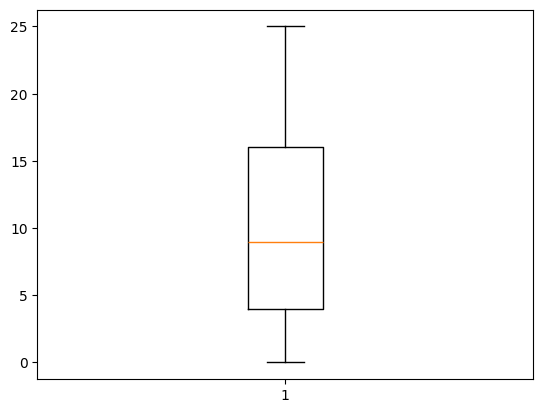

In [71]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(df['Years of Experience'])
plt.show()

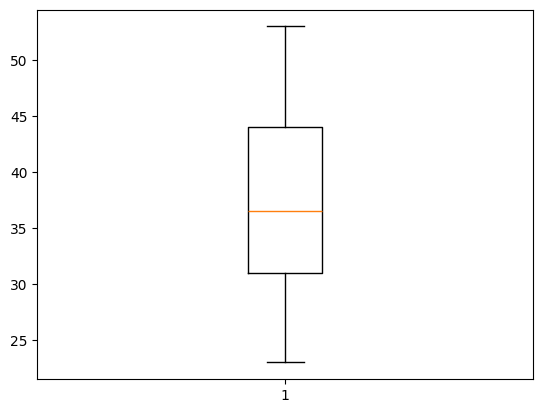

In [72]:

import matplotlib.pyplot as plt   #visualization
plt.boxplot(df['Age'])
plt.show()

# feature selection

In [73]:
X = df_encoded.drop(columns=["Job Title", "Salary", "Gender"])
y = df_encoded["Salary"]

In [74]:
X.head()

,Age,Years of Experience,Education Level_Master's,Education Level_PhD
0,32.0,5.0,0,0
1,28.0,3.0,1,0
2,45.0,15.0,0,1
3,36.0,7.0,0,0
4,52.0,20.0,1,0


## train test split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

## cross validation

In [76]:
kf = KFold(n_splits=10, shuffle=True, random_state=30)

In [78]:
rf = RandomForestRegressor(n_estimators=500, random_state=11)


In [79]:
scores = cross_val_score(rf, X, y, cv=kf)
print(f"Cross Validation Score: {np.mean(scores)*100:0.2f}%")

Cross Validation Score: 85.81%


## fitting the model

In [80]:
rf.fit(X_train, y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [81]:
score = rf.score(X_train, y_train)*100
print(f"Model Score: {np.round(score, 2)}%")

Model Score: 94.15%


## prediction

In [82]:
predicted_salary = np.round(rf.predict(X_test))

In [83]:
d = {
    "Actual_Salary" : y_test,
    "Predicted_Salary" : predicted_salary,
    "error": predicted_salary - y_test
}
predected_df = pd.DataFrame(d)
predected_df.head()

,Actual_Salary,Predicted_Salary,error
224,160000.0,152630.0,-7370.0
279,140000.0,130743.0,-9257.0
130,160000.0,178505.0,18505.0
186,100000.0,93598.0,-6402.0
149,175000.0,170956.0,-4044.0


In [84]:
score = r2_score(y_test, predicted_salary)*100
print(f"Model Score: {np.round(score, 2)}%")

Model Score: 93.58%


In [85]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_salary))
print(f"Error Ratio: {rmse:.3f}")

Error Ratio: 12844.269


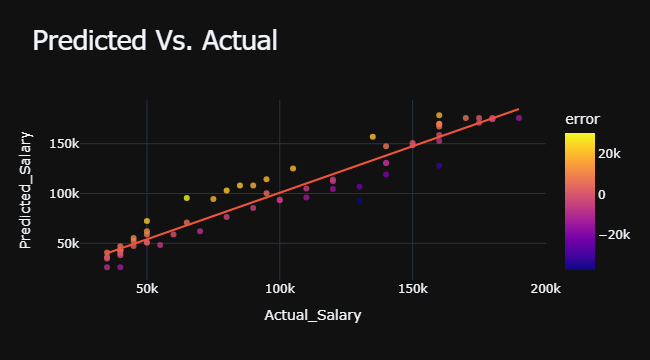

In [86]:
fig = px.scatter(
    predected_df, 
    x = "Actual_Salary", 
    y = "Predicted_Salary",
    color = "error",
    opacity=0.8,
    title= "Predicted Vs. Actual",
    template="plotly_dark",
    trendline="ols"
    
)

fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
)
iplot(fig)